In [1]:
"""
Peptide Length Distro
@JJ
"""

'\nPeptide Length Distro\n@JJ\n'

In [2]:
import os, re, sys
import numpy as np
import pandas as pd
from math import log
import random
import scipy.io
from collections import defaultdict

In [3]:
# in a well-defined initial state.
random.seed
np.random.seed(1337)

In [4]:
pos_data = pd.read_csv('positive_epitope_seq.txt', sep = '\t', header = None)

In [5]:
pos_data

,0,1,2
0,KLEDLERDL,HLA-A*02:01,1
1,LITGRLQSL,HLA-A2,1
2,EVMPVSMAK,HLA-A*03:01,1
3,EVMPVSMAK,HLA-A*11:01,1
4,KTFPPTEPK,HLA-A*03:01,1
...,...,...,...
88035,ILLWQPIPV,HLA-A*02:01,1
88036,ALDVYNGLL,HLA-A*02:01,1
88037,LTDAVKVMDL,HLA-A*02:01,1
88038,KLQCVDLHV,HLA-A*02:01,1


In [6]:
#rename columns
pos_data.rename(columns= {0:'epitope', 1:'allele', 2:'label'}, inplace = True)

In [7]:
#remove these drug names from the epitopes list
removedValue = ['abacavir', 'carbamazepine', 'oxcarbazepine', 'licarbazepine']

In [8]:
#remove from data frame coontaining data
for values in removedValue:
    pos_data.drop(pos_data[pos_data['epitope'] == values].index, inplace = True)

In [9]:
#check how many samples were removed
pos_data

,epitope,allele,label
0,KLEDLERDL,HLA-A*02:01,1
1,LITGRLQSL,HLA-A2,1
2,EVMPVSMAK,HLA-A*03:01,1
3,EVMPVSMAK,HLA-A*11:01,1
4,KTFPPTEPK,HLA-A*03:01,1
...,...,...,...
88035,ILLWQPIPV,HLA-A*02:01,1
88036,ALDVYNGLL,HLA-A*02:01,1
88037,LTDAVKVMDL,HLA-A*02:01,1
88038,KLQCVDLHV,HLA-A*02:01,1


In [12]:
lengths = [1235, 138602, 33720, 1946, 201, 127, 106, 488]
kmers = ['8-mer', '9-mer', '10-mer', '11-mer', '12-mer', '13-mer', '14-mer', '15-mer']

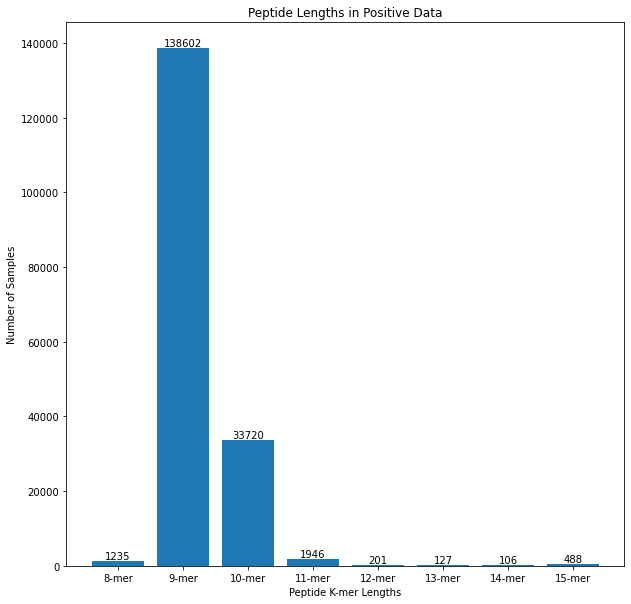

In [13]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,10))
b = plt.bar(kmers, lengths)
plt.bar_label(b, label_type = 'edge')
plt.title('Peptide Lengths in Positive Data')
plt.xlabel('Peptide K-mer Lengths')
plt.ylabel('Number of Samples')
plt.show()

In [10]:
#store positive epitope sequences
sequences = pos_data['epitope']

In [11]:
#save as text file 
sequences.to_csv('positive_sequences.txt', header = False, index = False)

In [ ]:
#write as fasta sequence
ofile = open("/home/jjia1/viralepitope/viralepitope/positive_sequences.fasta", "w")
i = 0
for line in sequences:
    ofile.write('>Sequence_'+str(i)+'\n'+line+'\n')
    i = i+1
ofile.close() 